In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_pickle("filteredDataAQ.pkl") 
df.head() 

,PM2.5,PM10,NO2,NH3,SO2,CO,AQI,datetime,Year,Month,Day,Weekday,Hour,TEMPERATURE,ALTITUDE,HUMIDITY
0,68,64,17,4,28,31,68,1/3/2020 10:00,2020,1,3,Friday,10,26,76,52
1,67,70,23,2,13,49,77,1/3/2020 10:00,2020,1,3,Friday,10,39,115,54
2,32,64,26,5,6,19,32,1/3/2020 10:00,2020,1,3,Friday,10,34,153,88
3,93,93,31,3,9,57,93,1/3/2020 10:00,2020,1,3,Friday,10,30,405,79
4,60,55,20,5,18,29,60,1/5/2020 6:00,2020,1,5,Sunday,6,27,102,72


In [3]:
df.values

array([[68, 64, 17, ..., 26, 76, 52],
       [67, 70, 23, ..., 39, 115, 54],
       [32, 64, 26, ..., 34, 153, 88],
       ...,
       [162, 136, 43, ..., 28, 261, 67],
       [213, 152, 55, ..., 32, 166, 80],
       [199, 166, 60, ..., 20, 435, 65]], shape=(1565, 16), dtype=object)

In [4]:
X=df.drop("AQI",axis=1)
Y=df["AQI"]
n=df.shape[0]
n=int (n*0.65)
train_x=X[:n-1]
test_x=X[n-1:-1]
train_y=Y[1:n]
test_y=Y[n:]
train_y=train_y.astype(int)
test_y=test_y.astype(int)

### Logistic Regression

In [5]:
# model=LogisticRegression()
# model.fit(train_x,train_y)
# p=model.predict(test_x)
# acc_log= round(model.score(train_x,train_y) * 100, 2)
# acc_logP= round(model.score(test_x,test_y) * 100, 2)

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_pickle("filteredDataAQ.pkl")

# Convert Weekday to numeric
df['Weekday'] = df['Weekday'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

# Drop datetime column
df = df.drop('datetime', axis=1)

# Features and target
X = df.drop('AQI', axis=1)
Y = df['AQI'].astype(int)

# Split into train/test (65% train)
n = int(df.shape[0] * 0.65)
train_x = X[:n]
train_y = Y[:n]
test_x = X[n:]
test_y = Y[n:]

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(train_x, train_y)
acc_log = round(model.score(train_x, train_y) * 100, 2)
acc_logP = round(model.score(test_x, test_y) * 100, 2)

print("Logistic Regression Train Accuracy:", acc_log)
print("Logistic Regression Test Accuracy:", acc_logP)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knnP = round(knn.score(test_x, test_y) * 100, 2)

print("KNN Train Accuracy:", acc_knn)
print("KNN Test Accuracy:", acc_knnP)


Logistic Regression Train Accuracy: 51.03
Logistic Regression Test Accuracy: 2.37
KNN Train Accuracy: 33.73
KNN Test Accuracy: 2.74


C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### KNN

In [7]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(train_x,train_y)  
Y_pred = knn.predict(test_x)  
acc_knn = round(knn.score(train_x,train_y) * 100, 2)  
acc_knnP = round(knn.score(test_x,test_y) * 100, 2)
Y_pred

array([175, 201, 211, 211, 102, 102,  84, 175, 134, 188,  94,  89,  46,
       125, 151,  99, 259, 109, 255,  93, 253, 103, 265, 103, 350, 101,
       334, 154,  92, 155, 105,  69, 228, 154, 167, 123, 109, 102,  87,
        65, 280, 117, 119,  63,  69, 102, 118,  57, 150,  60,  95,  62,
        68, 102, 107,  50, 155,  68,  87,  45,  54, 123,  80,  32,  86,
        69,  91,  46,  63, 100,  68,  63,  94,  62, 105,  46,  60, 110,
        46,  60,  91,  45,  84,  61,  62, 122,  61,  62,  91,  46,  54,
        93,  87, 303,  69, 142, 112, 205, 123, 146, 141, 134,  78, 304,
        94, 135, 166, 202, 141, 118, 102,  70,  69, 261,  79, 143, 111,
       224, 123, 124, 103,  77,  87, 265,  76, 147, 123, 202,  78,  94,
       109,  98,  66, 294,  82, 144, 100, 194,  77, 123,  76, 123,  70,
       261,  99, 144, 106, 170,  84,  99, 110, 102,  65, 169,  62, 109,
        88, 239, 123, 124,  95,  99,  85, 228,  69, 102, 102, 190, 123,
       123,  88,  45,  68,  44,  44,  64,  33,  62,  31,  50,  4

### Random Forest

In [8]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x,train_y)

Y_prediction = random_forest.predict(test_x)

acc_random_forest = round(random_forest.score(train_x,train_y) * 100, 2)
acc_random_forestP = round(random_forest.score(test_x,test_y) * 100, 2)
Y_prediction

array([200, 201, 220, 220,  86, 109,  83, 198, 141, 228, 104,  88,  64,
       134, 164, 112, 261, 112, 165, 103, 233, 103, 263, 112, 281, 112,
       345, 169, 100, 213, 105,  87, 262, 155, 167, 137, 100, 198,  94,
        80, 345, 119, 146,  69,  77,  94, 119,  69, 150,  78,  89,  63,
        79, 123, 117,  69, 144,  98, 100,  46,  64, 123,  80,  69,  89,
        78, 115,  44,  64,  96,  78,  44,  95,  69,  88,  46,  60, 109,
        70,  62, 102,  61,  75,  45,  69, 102,  55,  62,  80,  43,  80,
       114, 100, 314,  60, 114, 152, 232, 135, 155, 112, 155, 100, 271,
       114, 119, 177, 232, 141, 137, 119,  76,  93, 310, 103, 151, 147,
       239, 123, 141, 112,  79,  87, 178, 103, 159, 121, 239, 100,  94,
       112,  99,  87, 296, 123, 144, 106, 239, 123, 100, 112,  97,  80,
       178, 114, 144, 106, 170, 101, 115, 164, 107,  86, 144, 104, 112,
       106, 239, 123, 122, 104, 123,  85, 145, 104, 123,  92, 263, 123,
       146, 112,  91,  57,  46,  57,  91,  43,  64,  46,  57,  5

### Decision Tree

In [9]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_x,train_y)  
Y_pred2 = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(train_x,train_y) * 100, 2)  
acc_decision_treeP = round(decision_tree.score(test_x,test_y) * 100, 2)
Y_pred2

array([211, 201, 224, 225,  88, 112,  81, 198, 141, 228, 103,  88,  96,
       144, 175, 112, 247,  98, 247,  98, 265,  98, 271, 119, 349, 119,
       329, 175, 100, 152,  45,  83, 269, 164, 160, 165,  89, 125,  84,
        94, 315, 128, 147,  60,  98,  93, 119,  61, 171,  82,  96,  60,
        82, 123, 119,  61, 173,  82,  98,  45,  60, 123,  95,  69,  80,
        72,  92,  44,  60, 107,  95,  69,  80,  69,  92,  46,  60, 114,
        61,  54,  80,  61,  72,  61,  34, 117,  61,  58,  80,  81,  72,
       109,  95, 317,  93, 128,  98, 223, 130, 175, 128, 160,  93, 287,
        75, 126, 197, 223, 142, 124, 118,  78,  80, 271, 102, 147, 120,
       217, 104, 128, 173,  79,  83, 275, 104, 147, 128, 217, 100, 128,
       115,  92,  80, 278,  98, 187, 115, 198,  96, 111, 123,  97,  79,
       272, 100, 122, 114, 175,  92, 109, 114, 104,  87, 193,  93, 108,
       122, 210, 161, 144, 107, 105,  87, 198,  93, 192, 101, 210, 123,
       151, 107,  96,  96,  51,  51,  50,  30,  96,  33,  50,  4

### 'Support Vector Machines

In [10]:
linear_svc = LinearSVC()
linear_svc.fit(train_x,train_y)

Y_pred3 = linear_svc.predict(test_x)

acc_linear_svc = round(linear_svc.score(train_x,train_y) * 100, 2)
acc_linear_svcP = round(linear_svc.score(test_x,test_y) * 100, 2)
Y_pred3

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([242, 217, 144, 144,  88, 104, 101, 144, 115, 131, 110, 242,  44,
       193, 148,  65, 144, 199, 144,  65, 142,  65, 319,  65, 335, 130,
       335,  76,  91,  76,  87,  76, 169, 189, 268,  87,  67, 105, 110,
       105, 346,  98, 108,  89, 141,  89,  70,  54, 120,  89, 108,  63,
        94,  69,  87,  69, 287, 123, 126,  69,  44, 123,  44,  74,  69,
        63, 118,  84,  44, 230,  69,  57, 124, 124, 126,  62,  44, 104,
        70, 198, 102,  63, 158,  62, 173, 104,  70, 130, 197,  66, 158,
       183, 131, 317,  76, 114, 114, 301,  76, 216,  98, 189, 105, 304,
       105, 105, 189, 189, 105, 189, 105, 101,  43, 261,  54,  89, 106,
       121,  78, 244, 106,  63,  78, 258, 156,  89, 106, 121,  78,  69,
       121, 153,  69, 329,  69, 160, 173, 160,  97, 305, 173,  92,  80,
       178, 114, 178,  64, 164, 149, 215,  65, 105, 102, 265,  62, 111,
       106, 113, 270, 217, 222, 153, 144, 281, 104, 105, 105, 141, 123,
       293,  53,  44,  65,  46,  50,  91,  65,  44,  65,  35,  6

### RESULT

In [14]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Train_Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest,acc_decision_tree],
    'Test_Score': [acc_linear_svcP, acc_knnP, acc_logP, 
              acc_random_forestP,acc_decision_treeP]})
result_df = results.sort_values(by='Test_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train_Score,Test_Score
Model,,
Decision Tree,100.00,30.84
Random Forest,100.00,4.01
KNN,33.73,2.74
Logistic Regression,51.03,2.37
Support Vector Machines,45.03,1.28


### Evaluation

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test_y, Y_pred3))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 54.827


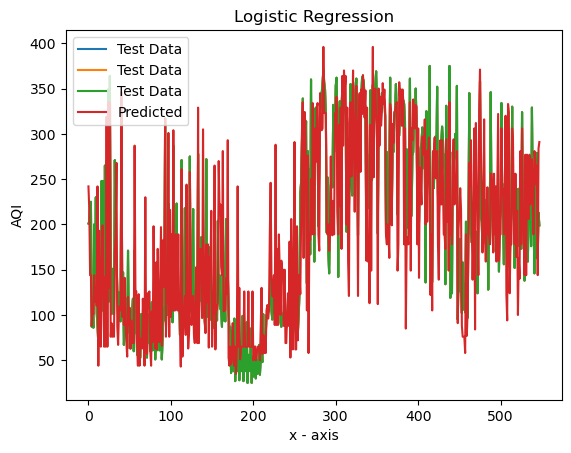

In [33]:
# Logistic Regression  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Logistic Regression')
plt.legend()
plt.show() 

In [29]:
rmse1 = np.sqrt(mean_squared_error(Y_pred3, test_y))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 54.827


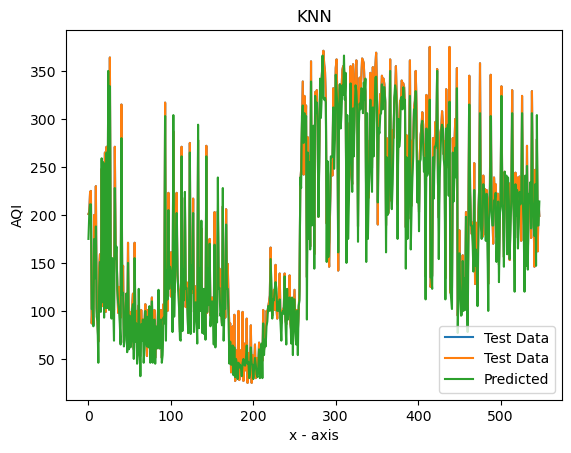

In [19]:
# KNN  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('KNN')
plt.legend()
plt.show() 

In [34]:
rmse2 = np.sqrt(mean_squared_error(Y_pred3, test_y))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 54.827


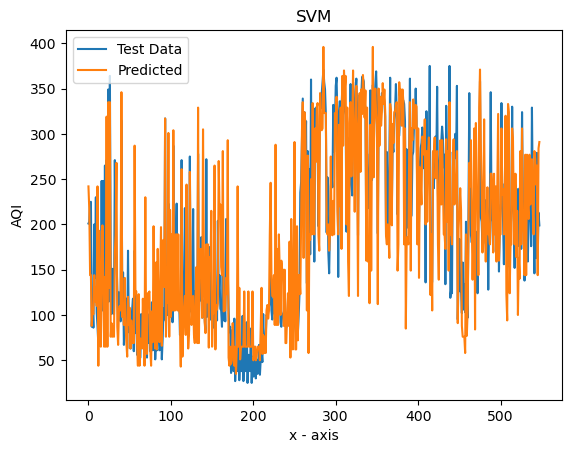

In [35]:
# SVM  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred3,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('SVM')
plt.legend()
plt.show() 

In [36]:
rmse3 = np.sqrt(mean_squared_error(Y_pred2, test_y))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 14.432


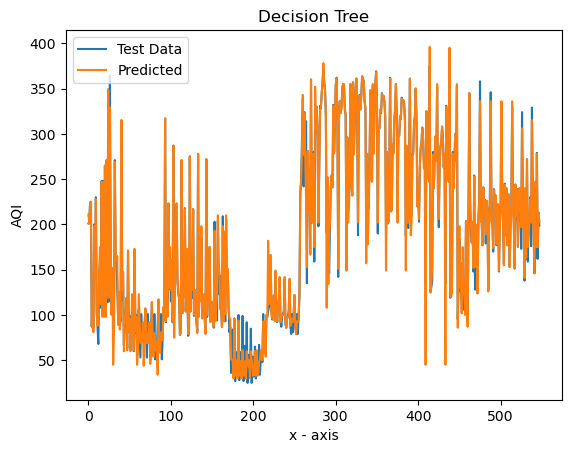

In [37]:
# Dession Tree  
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_pred2,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Decision Tree')
plt.legend()
plt.show() 

In [38]:
rmse4 = np.sqrt(mean_squared_error(Y_prediction, test_y))
print('Test RMSE: %.3f' % rmse4)

Test RMSE: 32.578


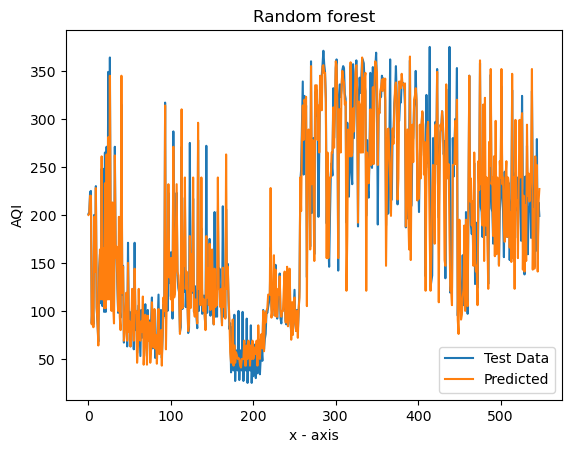

In [39]:
# Random Forest 
plt.plot(range(len(test_y)), test_y,label="Test Data") 
plt.plot(range(len(test_y)), Y_prediction,label="Predicted")
plt.xlabel('x - axis') 
plt.ylabel('AQI')
plt.title('Random forest')
plt.legend()
plt.show() 

In [40]:
# Serialize mlp_nn object into a file called mlp_nn.pkg on disk using pickle
import pickle
with open('decisionTree.pkl', 'wb') as handle:
    pickle.dump(decision_tree, handle, pickle.HIGHEST_PROTOCOL)
    

In [41]:
# de-serialize mlp_nn.pkl file into an object called mlp_nn using pickle
with open('decisionTree.pkl', 'rb') as handle:
    aqiModel = pickle.load(handle) 

In [42]:
test_x

,PM2.5,PM10,NO2,NH3,SO2,CO,Year,Month,Day,Weekday,Hour,TEMPERATURE,ALTITUDE,HUMIDITY
1017,187,201,113,12,8,45,2020,1,7,1,3,39,490,39
1018,203,148,24,4,10,87,2020,1,7,1,3,28,441,76
1019,224,176,57,2,8,77,2020,1,7,1,3,36,260,52
1020,225,139,40,4,13,59,2020,1,7,1,3,39,260,50
1021,85,87,76,6,25,27,2020,1,7,1,3,27,349,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,163,142,57,7,10,39,2020,1,7,1,3,20,499,57
1561,279,215,78,11,23,31,2020,1,7,1,3,20,226,41
1562,162,136,43,4,16,34,2020,1,7,1,3,28,261,67
1563,213,152,55,5,11,95,2020,1,7,1,3,32,166,80
